# Optimization of Resources for Waste Management

Spring 2020 [IS 590:  Progr Analytics & Data Process]

Monte Carlo Simulation technique will be used to calculate the probability of a bin near an apartment complex being full

<img src="imagee.png">

# Project Description
The project illustrates on optimizing the resources for waste management. Here we create a apartment complex scenario and see how we can increase sanitation and reduce the investment cost by a subtitute of small labor 

Hypothesis: If we change from emptying the bins once per week to TWICE per week, we should be able to contain the garbage better (less overflows) even while reducing the NUMBER of bins by 40%

# Libraries Imported

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

# Creating 1st  Function: Scenario Main

**Residents** --Using this we can enter a random number of residents in a multi-family apartment complex, for this mc stimulation we are using fixed residents in the complex "250"

**Get the “Specific Weight” of the waste you want to use the container for** --The “specific weight” of something tells you how much weight there is in a given volume. In this case it is how many pounds of trash fit in one yard of trash.

**Example** --For regular trash, an average number is about 175 pounds per yard. If people don’t push their trash down into the cans or bags, it can be lower – maybe 125 pounds. If they push it down as much as possible and spend a lot of time pushing it down to fit in the bag, it could be 225 pounds per yard

**Trash Bin Size and Collections** --
You will need to select the size of dumpster you want and how many times per week it is emptied. Once per week collection is usually the minimum in summer – but it depends on how hot and smelly and how far away the dumpsters are from people’s homes. If you have the labor and resources, you might plan on 2 times per week. We will be doing our hypothesis based on two times a week

<img src="imageee.jpg">

In [14]:
def scenario_main():
    residents=250
    trash_bin_size=4 #4 cubic yard trash
    print ('Number of residents in Apartment Complex: ',residents)
    mc_stimulation = int(input('Number of MC stimulations:'))
    collections = int(input('Number of trash collection (suggestion 1 or 2):'))
    
    if collections==1:
        bins = 11
        stimulate(mc_stimulation, bins, trash_bin_size, residents, collections)
        
    elif collections==2:
        bins = 6  
        stimulate(mc_stimulation, bins, trash_bin_size, residents,collections)
        
    elif collections>2:
        print("Not a viable scenario")

# Creating 2nd Function:Triangular Distribution

**Triangular Distribution** -- A triangular distribution is a continuous probability distribution with a probability density function shaped like a triangle. It is defined by three values: the minimum value a, the maximum value b, and the peak value c.

For my project I have used 1.5 as minimum, 4.7 as maximum and 8.1 peak value along with the number of residents. Then I have calculated the trash collected for one resident, after normalization we have calculated for a week and their complete trash

In [15]:
def triangular(no_of_residents):
    wt=175
    triangular_values=list(np.random.triangular(1.5, 4.7, 8.1, no_of_residents))
    trash_residents= [x / wt for x in triangular_values]
    trash_weekly= [x*7 for x in trash_residents]
    complete_trash=sum(trash_weekly)
    return(complete_trash)

# Creating 3rd Function:Stimulate

**Stimulation** --The number of stimulations is entered by the user!

**Determine how much waste volume each person makes on average, using your total waste
number and your specific waste number** --(Conidering each person throws out 4.7 pounds at maximum)
4.7 pounds per person per day ÷ (divided by) 175 lbs per yard x 7 days per week. = 
4.7 divided by 175 x 7=0.188 cubic yards per person each week.

**Determine how many dumpsters will be required** --
    Total trash per week ÷ (divided by) Bin size ÷ (divided by) No of collections
    Example: (47/4)/1 = 11.75 Dumpsters


In [16]:
def stimulate(N, No_bins, bin_size, persons, collect):
    output_data=[]
    for i in range(N):
        per_stimulation=[]
        total_trash=0
        
        capacity = bin_size*No_bins
        
        if collect==1:
            total_trash=triangular(persons)
        if collect==2:
            total_trash=triangular(persons)
            total_trash=total_trash/2
            
                
        per_stimulation.append(persons)
        per_stimulation.append(No_bins)
        per_stimulation.append(capacity)
        per_stimulation.append(total_trash)
        
        value=threshold(total_trash, capacity)
        
        if value[2]==1:
            per_stimulation.append(value[0])
            per_stimulation.append(0)
            per_stimulation.append("No")
            per_stimulation.append(value[1])
            
            
        elif value[2]==2:
            per_stimulation.append(0)
            per_stimulation.append(value[0])
            per_stimulation.append("No")
            per_stimulation.append(value[1])
            
        elif value[2]==3:
            per_stimulation.append(0)
            per_stimulation.append(0)
            per_stimulation.append(value[0])
            per_stimulation.append(value[1])
            
        output_data.append(per_stimulation)
    
    conclusions(output_data)

# Creating 4th Function: Threshold

**Underfull** -- This will calculate if the trashcan still has place to hold to trash.

**Overfull** --This will calculate if the trashcan is over filled and now the trash has started smelling.

**Full** -- This will calculate if the trashcan is exactly 100% full.

If your total waste planned for is known by total pounds instead of per person, just divide it by the
number of people in your village to get your weight per person. If you have a total volume, divide it
by the number of people to get your volume per person. Convert the volume to yards because most
waste containers are sized in yards.

In [17]:
def threshold(trash, cap):    
    if trash<cap:
        Underfull = 100-(trash/cap*100)
        Underfull = round(Underfull, 3)
        return([Underfull,"Underfull",1])
    
    elif trash>cap:
        overfull = (trash-cap)/cap*100
        overfull = round(overfull, 3)
        return([overfull,"Overfull",2])
        
    elif int(trash)==cap:
        full = "YES"
        return([full,"Full",3])

# Creating 5th Function: Conclusions

**Final Data** -- This will give a Data Frame with the following:<br />
0: Number of Residents<br />
1: Number of Bins
2: Trash Capacity
3: Total Trash per week
4: Percent Empty
5: Percent Over Fill
6: Is Full?
7: Status of Bins

**Report** --This will calculate the report and give the dataframe with the following:count,mean,std,min,25%,50%,75%,max

In [18]:
def conclusions(data):
    final_data=pd.DataFrame(data)
    final_data=final_data.rename(columns={0:'Number of Residents', 1: "Number of Bins", 2: "Trash Capacity", 3: "Total Trash per week", 
                              4: "Percent Empty", 5: "Percent Over Fill", 6: "Is Full?", 7:"Status of Bins"})
    report=final_data.describe()
    display (final_data)
    display (report)
    
    final_data["Clean"]=final_data["Status of Bins"]=='Underfull'
    values=[]
    for i in range(len(final_data)):
        if final_data["Percent Empty"][i]!=0.0:
            values.append(final_data["Percent Empty"][i])
        elif final_data["Percent Over Fill"][i]!=0.0:
            values.append(-(final_data["Percent Over Fill"][i]))
        else:
            values.append(0)
            
    final_data["Percentage Clean"]=values  
    
    fig = plt.figure(figsize=(10,18))
    final_data["Percentage Clean"].plot(kind='barh', color=final_data.Clean.map({True:'g', False: 'r'}))
    plt.title("The Percentage of Status and Cleanliness of the Bins")
    plt.show()
    
    plt.hist(final_data["Total Trash per week"], bins="auto")
    plt.title("Histogram for Total Trash")
    plt.show()
    
    final_data["Status of Bins"].value_counts().plot(kind="bar")
    plt.title("Number of Bins under each Status")
    plt.show()

Number of residents in Apartment Complex:  250
Number of MC stimulations:1000
Number of trash collection (suggestion 1 or 2):2


,Number of Residents,Number of Bins,Trash Capacity,Total Trash per week,Percent Empty,Percent Over Fill,Is Full?,Status of Bins
0,250,6,24,23.610361,1.623,0.000,No,Underfull
1,250,6,24,23.951006,0.204,0.000,No,Underfull
2,250,6,24,24.374189,0.000,1.559,No,Overfull
3,250,6,24,24.569118,0.000,2.371,No,Overfull
4,250,6,24,24.211022,0.000,0.879,No,Overfull
5,250,6,24,24.654624,0.000,2.728,No,Overfull
6,250,6,24,23.286219,2.974,0.000,No,Underfull
7,250,6,24,23.758391,1.007,0.000,No,Underfull
8,250,6,24,22.902547,4.573,0.000,No,Underfull
9,250,6,24,23.375743,2.601,0.000,No,Underfull


,Number of Residents,Number of Bins,Trash Capacity,Total Trash per week,Percent Empty,Percent Over Fill
count,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000
mean,250.0,6.0,24.0,23.838508,1.101857,0.428972
std,0.0,0.0,0.0,0.426439,1.260704,0.788318
min,250.0,6.0,24.0,22.513965,0.000000,0.000000
25%,250.0,6.0,24.0,23.537994,0.000000,0.000000
50%,250.0,6.0,24.0,23.832971,0.696000,0.000000
75%,250.0,6.0,24.0,24.140802,1.925250,0.586750
max,250.0,6.0,24.0,25.081757,6.192000,4.507000


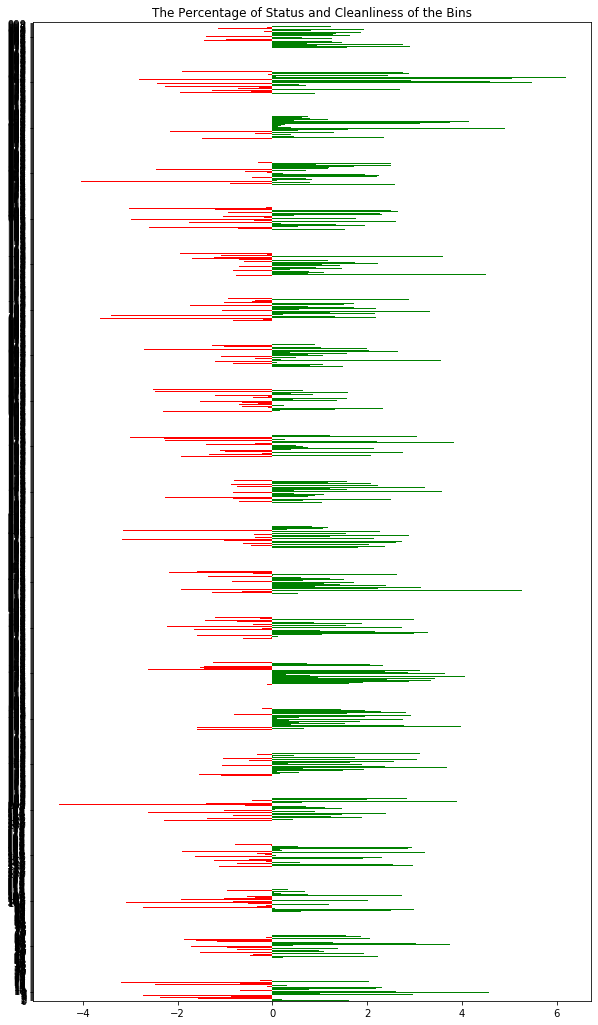

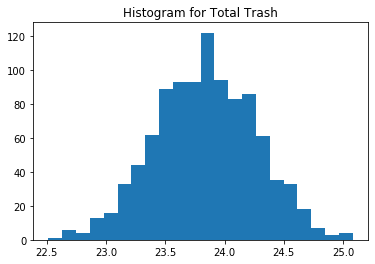

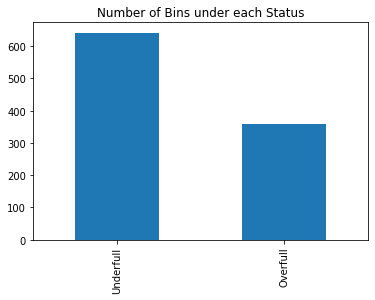

In [22]:
scenario_main()

In [20]:
def triangular_stimulations(no_of_residents):
    plt.hist(np.random.triangular(1.5, 4.7, 8.1, no_of_residents), bins=200)
    plt.show()

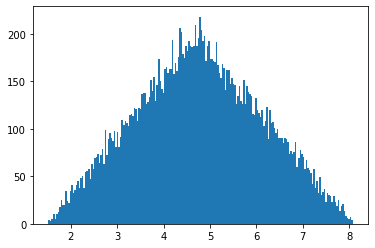

In [21]:
triangular_stimulations(20000)